In [1]:
import os
import h5py 
import numpy as np
import astropy.table as aTable
from astropy.cosmology import Planck13

In [2]:
from provabgs import models as Models

In [3]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [5]:
dat_dir = '/tigress/chhahn/provabgs/svda'

In [6]:
bgs = aTable.Table.read(os.path.join(dat_dir, 'BGS_BRIGHT_clustering.sv3.logM.hdf5'))

In [7]:
bgs

RA,DEC,TARGETID,NTILE,TILES,Z,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,WEIGHT_ZFAIL,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,NZ,WEIGHT_FKP,phi,theta,healpix,logM_mcmc [30],zmax,theta_bf [13]
float64,float64,int64,int64,bytes43,float64,float64,float64,float64,float64,int64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,int64,float64,float64,float64
191.20458196461243,60.31535787110577,39633390185481345,1,100,0.08969256109731599,0.64,3.0,1.613220114177946,1.0,-1 .. -1,1.0,1.0,1.0,11.618794,18.39226,20.892622,13.421043,9.27371,0.04778151135868713,0.0030821516772042766,3.3371495001818547,0.5180947424254233,11226,9.311141344469839 .. 9.30371384223851,0.244537973921384,9.299830413616577 .. 0.12427289814965596
187.04622815471808,60.82670180284912,39633396124617897,1,100,0.37400455377945924,0.64,3.0,1.6801915534232357,1.0,-1 .. -1,1.0,1.0,1.0,4.046807,16.82531,38.79777,85.02852,54.11833,0.0009577827729000268,0.133626516949366,3.264572534736348,0.5091701072064087,11237,11.532893592539585 .. 11.652536919740712,0.5180062804791324,11.529095176742617 .. 0.3710937098062413
187.83760708675698,60.38987543677365,39633393155049303,1,100,0.1731108191825362,0.64,3.0,1.7267282368438097,0.5,6932875859169517021 .. -6858338461939850770,0.4609375,1.0,2.15,13.26433,27.728409,46.020153,37.03337,25.867756,0.01270745015908088,0.01149149450827468,3.2783847027313433,0.5167941655539476,11237,10.562881907340254 .. 10.51416114213185,0.3653015609857238,10.502975152735333 .. 0.2744993206027024
187.05117249536465,62.614542270156655,39633416324383107,1,100,0.2703579310142208,0.64,3.0,1.5579854421783794,1.0,-1 .. -1,1.0,1.0,1.0,4.4575434,17.798513,37.420948,46.075268,30.963612,0.004051015958871262,0.035183206585599834,3.264658829759971,0.47796640455149814,11251,11.164636307948935 .. 11.122322575621661,0.3243951220160425,11.16028636319183 .. 0.6710591095679554
191.14757099005186,60.345815959235,39633390185480938,1,100,0.2819459922463374,0.64,3.0,1.5743490921284766,0.5,4864741233190265570 .. 434972757299228716,0.359375,1.0,2.74468085106383,6.782468,16.732075,29.996437,31.939342,25.343126,0.004051015958871262,0.035183206585599834,3.3361544709660023,0.5175631485037057,11226,11.088944348844176 .. 11.20103049582311,0.42353546824905075,11.14249424405227 .. 0.3651476796540595
186.48359894373857,61.73967570511937,39633407801558322,1,100,0.08577825488213503,0.64,3.0,1.6169466967221486,1.0,8781239440956233492 .. -7057659983223072695,0.5546875,1.0,1.7916666666666667,15.079609,20.454126,26.065075,13.486019,10.797623,0.04778151135868713,0.0030821516772042766,3.2547528025368577,0.49323570662701194,11250,9.553030097515068 .. 9.616727386110236,0.15904907192264478,9.64110366817851 .. 0.34742311547544863
189.28672536137475,60.18713259808659,39633390168704731,1,100,0.21452305283357412,0.64,3.0,1.6400346453345047,1.0,-5560523680235883695 .. 5816301847492558499,0.546875,1.0,1.8169014084507042,6.3314033,19.638945,38.222126,43.818123,28.204218,0.00921472572098557,0.015778472793938094,3.303676587874243,0.5203326956238766,11215,10.933581427059641 .. 10.935814826524364,0.27474490830991904,10.945184197381453 .. 0.6296367359271199
189.20703625254848,60.13450219401336,39633390168704208,1,100,0.1842724056985206,0.64,3.0,1.6990866107210438,0.5,-1 .. -1,1.0,1.0,1.0,20.873507,47.31153,86.10893,73.21894,58.1018,0.01270745015908088,0.01149149450827468,3.3022857505472443,0.5212512694616096,11215,11.119193932010795 .. 11.087693511488103,0.47828502781727295,11.155540895363698 .. 0.23645233036989347
188.7298325265811,60.181046704454054,39633390164510257,1,100,0.2854181586411897,0.64,3.0,1.7154596184117625,0.3333333333333333,-1116572791947434369 .. -1544975305178865643,0.4296875,1.0,2.3035714285714284,9.799708,23.07847,40.24855,43.608025,32.920425,0.004051015958871262,0.035183206585599834,3.293956974326329,0.5204389145056906,11237,11.36773484584262 .. 11.267410531148103,0.46391551779465107,1

In [10]:
m_sps = Models.NMF(burst=True, emulator=True)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [17]:
tages = Planck13.age(bgs['Z']).value

In [21]:
msurv = m_sps._surviving_mass(bgs['theta_bf'][:,:12], tages, emulator=True)

In [24]:
logmsurv = np.log10(msurv)

(10000000.0, 10000000000000.0)

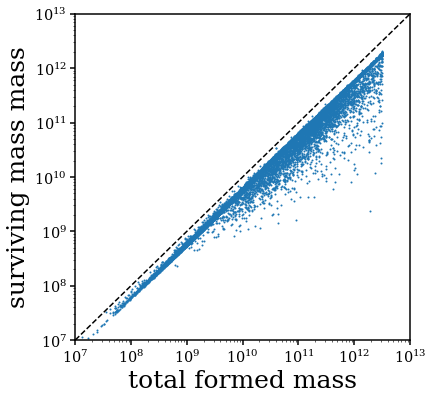

In [37]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(10**bgs['theta_bf'][:,0], msurv, s=1)
sub.plot([1e7, 1e13], [1e7, 1e13], c='k', ls='--')
sub.set_xscale('log')
sub.set_yscale('log')
sub.set_xlabel('total formed mass', fontsize=25)
sub.set_xlim(1e7, 1e13)
sub.set_ylabel('surviving mass mass', fontsize=25)
sub.set_ylim(1e7, 1e13)

In [33]:
bgs['logMstar_bf'] = logmsurv

In [41]:
bgs.write(os.path.join(dat_dir, 'BGS_BRIGHT_clustering.sv3.logMstar.hdf5'))

/home/chhahn/.conda/envs/gqp/lib/python3.7/site-packages/astropy/io/misc/hdf5.py:283: UserWarning: table path was not set via the path= argument; using default path __astropy_table__
  "using default path {}".format(path))


(6.0, 13.0)

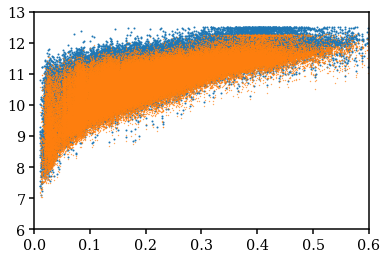

In [50]:
plt.scatter(bgs['Z'], bgs['theta_bf'][:,0], c='C0', s=1)
plt.scatter(bgs['Z'], bgs['logMstar_bf'], c='C1', s=0.1)

plt.xlim(0., 0.6)
plt.ylim(6, 13)

In [40]:
bgs_any = aTable.Table.read(os.path.join(dat_dir, 'BGS_ANY_clustering.sv3.logM.hdf5'))

In [42]:
tages = Planck13.age(bgs_any['Z']).value
msurv = m_sps._surviving_mass(bgs_any['theta_bf'][:,:12], tages, emulator=True)
logmsurv = np.log10(msurv)

bgs_any['logMstar_bf'] = logmsurv

(10000000.0, 10000000000000.0)

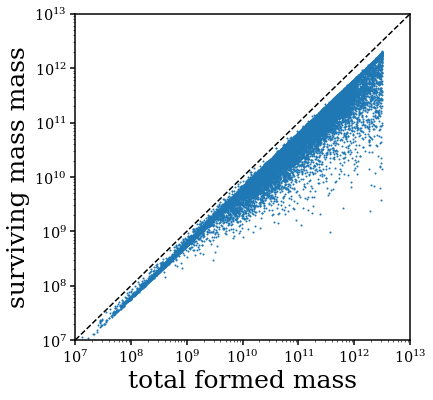

In [45]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(10**bgs_any['theta_bf'][:,0], 10**bgs_any['logMstar_bf'], s=1)
sub.plot([1e7, 1e13], [1e7, 1e13], c='k', ls='--')
sub.set_xscale('log')
sub.set_yscale('log')
sub.set_xlabel('total formed mass', fontsize=25)
sub.set_xlim(1e7, 1e13)
sub.set_ylabel('surviving mass mass', fontsize=25)
sub.set_ylim(1e7, 1e13)

In [43]:
bgs_any.write(os.path.join(dat_dir, 'BGS_ANY_clustering.sv3.logMstar.hdf5'))

(6.0, 13.0)

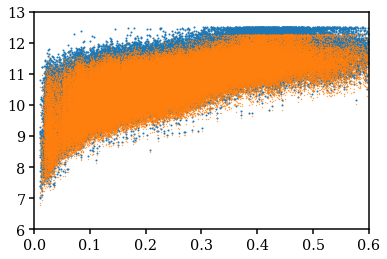

In [49]:
plt.scatter(bgs_any['Z'], bgs_any['theta_bf'][:,0], c='C0', s=1)
plt.scatter(bgs_any['Z'], bgs_any['logMstar_bf'], c='C1', s=0.1)

plt.xlim(0., 0.6)
plt.ylim(6, 13)